In [2]:
import os
os.makedirs("drugs_outputs", exist_ok=True)


In [4]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Divya\\Downloads\\drugs_side_effects_drugs_com.csv")  
df.head(8)


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",CaroSpir,35%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8.0,https://www.drugs.com/aldactone.html,https://www.drugs.com/condition/acne.html
6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,"Altreno, Atralin, Avita, Refissa, Renova, Reti...",30%,Rx,C,N,NaN,NaN,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439.0,https://www.drugs.com/mtm/tretinoin-topical.html,https://www.drugs.com/condition/acne.html
7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...","Absorica, Accutane, Amnesteem, Claravis, Myori...",26%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999.0,https://www.drugs.com/mtm/isotretinoin.html,https://www.drugs.com/condition/acne.html


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [9]:
miss = df.isnull().sum().sort_values(ascending=False)
miss.head(40)


alcohol                          1554
related_drugs                    1469
rating                           1345
no_of_reviews                    1345
brand_names                      1213
pregnancy_category                229
side_effects                      124
drug_classes                       82
generic_name                       43
rx_otc                              1
drug_name                           0
activity                            0
medical_condition                   0
medical_condition_description       0
csa                                 0
drug_link                           0
medical_condition_url               0
dtype: int64

In [13]:
df.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
rating,1586.0,6.812926,2.313044,0.0,5.6,7.0,8.5,10.0
no_of_reviews,1586.0,75.064943,184.900847,1.0,2.0,12.0,58.0,2934.0


In [17]:
df.columns = df.columns.str.strip()

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df = df.drop_duplicates()

print("Rows after dedupe:", len(df))
df[['generic_name','drug_classes','rating']].head(6)


Rows after dedupe: 2931


,generic_name,drug_classes,rating
0,doxycycline,"Miscellaneous antimalarials, Tetracyclines",6.8
1,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",7.2
2,minocycline,Tetracyclines,5.7
3,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",7.9
4,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",7.4
5,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",7.6


In [24]:
print("Missing ratings before:", df['rating'].isna().sum())
median_rating = df['rating'].median()
df['rating_filled'] = df['rating'].fillna(median_rating)
print("Filled missing ratings with median:", median_rating)


Missing ratings before: 1345
Filled missing ratings with median: 7.0


In [29]:
df['drug_classes'] = df['drug_classes'].astype(str)
df_classes = df.assign(drug_class_split = df['drug_classes'].str.split(',')).explode('drug_class_split')
df_classes['drug_class_split'] = df_classes['drug_class_split'].str.strip()
top_classes = df_classes['drug_class_split'].value_counts().head(10)
top_classes


drug_class_split
Upper respiratory combinations          245
Topical acne agents                     125
Topical steroids                         94
Antihistamines                           82
nan                                      82
Nonsteroidal anti-inflammatory drugs     72
Laxatives                                59
Miscellaneous topical agents             56
Topical rubefacient                      56
Topical anesthetics                      54
Name: count, dtype: int64

C:\Users\Divya\AppData\Local\Temp\ipykernel_2688\2709958213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.values, y=top_classes.index, palette='magma')


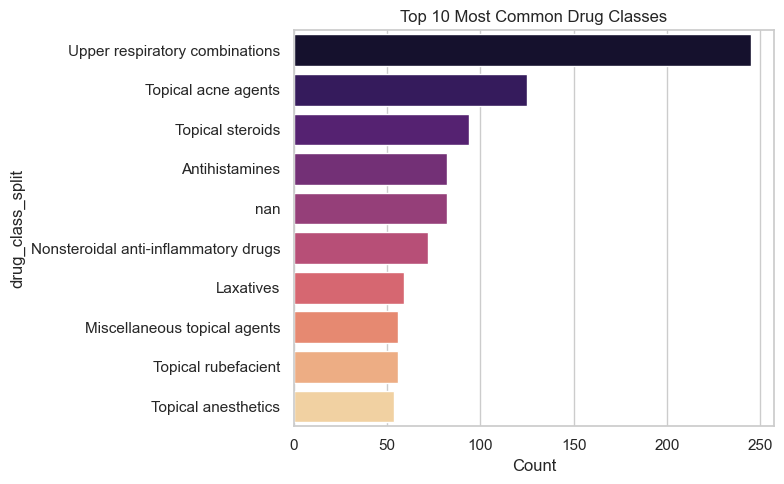

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(x=top_classes.values, y=top_classes.index, palette='magma')
plt.title("Top 10 Most Common Drug Classes")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("drugs_outputs/top_10_classes.png", dpi=200)
plt.show()


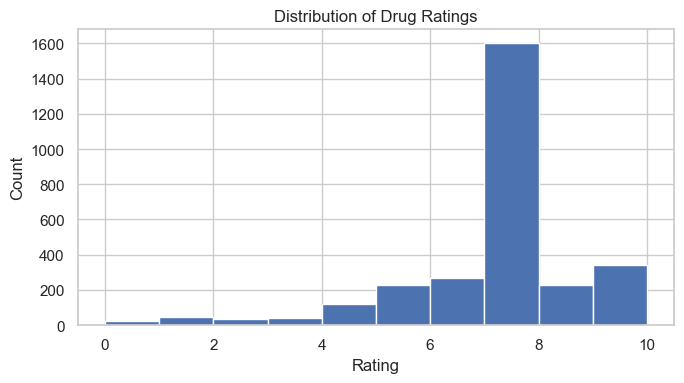

In [36]:
plt.figure(figsize=(7,4))
plt.hist(df['rating_filled'].dropna(), bins=10)
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("drugs_outputs/rating_hist.png", dpi=200)
plt.show()


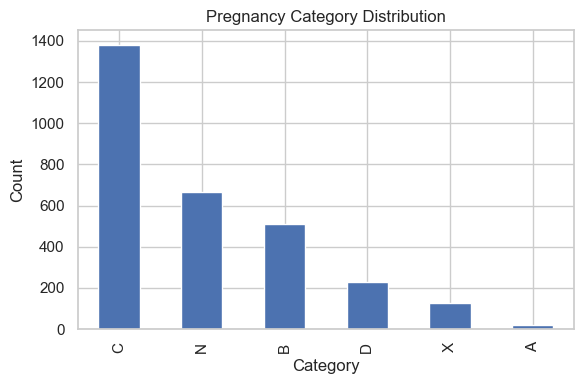

In [39]:
plt.figure(figsize=(6,4))
pc = df['pregnancy_category'].fillna('N').value_counts()
pc.plot(kind='bar')
plt.title("Pregnancy Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("drugs_outputs/pregnancy_cat.png", dpi=200)
plt.show()


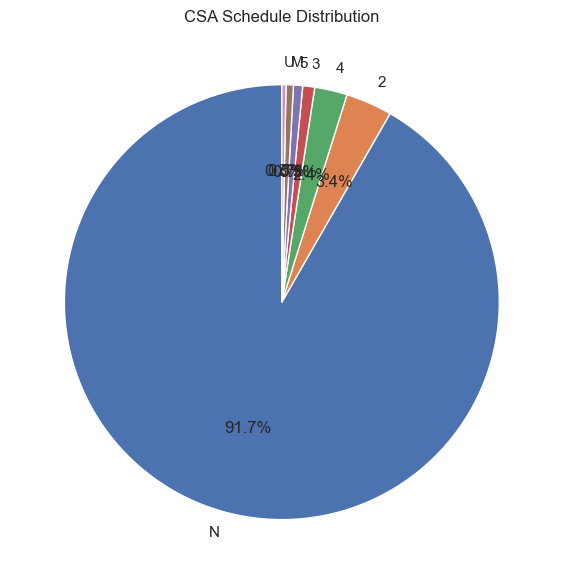

In [44]:
plt.figure(figsize=(6,6))
csa_counts = df['csa'].fillna('N').value_counts()
plt.pie(csa_counts, labels=csa_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("CSA Schedule Distribution")
plt.tight_layout()
plt.savefig("drugs_outputs/csa_pie.png", dpi=200)
plt.show()


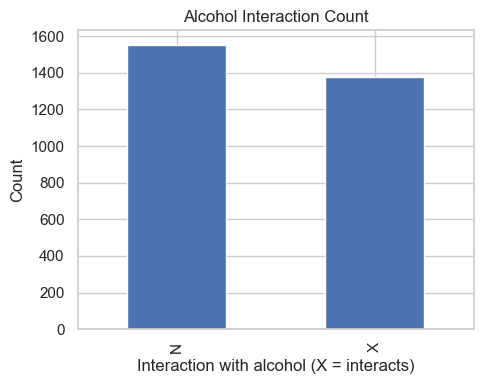

In [49]:
plt.figure(figsize=(5,4))
al = df['alcohol'].fillna('N').value_counts()
al.plot(kind='bar')
plt.title("Alcohol Interaction Count")
plt.xlabel("Interaction with alcohol (X = interacts)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("drugs_outputs/alcohol_interaction.png", dpi=200)
plt.show()


C:\Users\Divya\AppData\Local\Temp\ipykernel_2688\163463978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='crest')


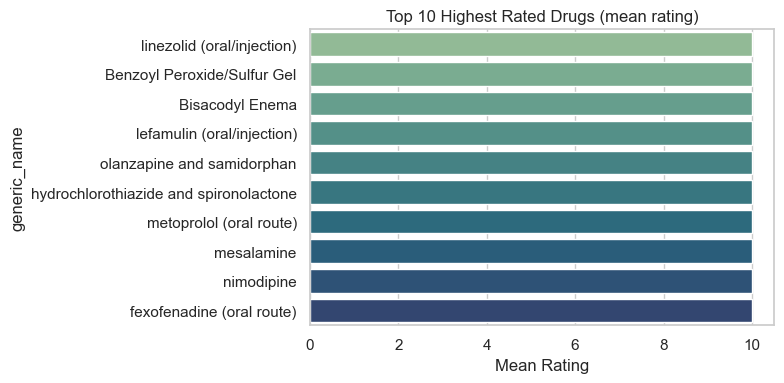

In [53]:
top_rated = df.groupby('generic_name')['rating_filled'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='crest')
plt.title("Top 10 Highest Rated Drugs (mean rating)")
plt.xlabel("Mean Rating")
plt.tight_layout()
plt.savefig("drugs_outputs/top10_rated.png", dpi=200)
plt.show()


In [56]:
top_classes.to_csv("drugs_outputs/top_classes.csv")
top_rated.to_csv("drugs_outputs/top10_rated.csv")
df.to_csv("drugs_outputs/drugs_cleaned_sample.csv", index=False)
print("Saved outputs in drugs_outputs/")


Saved outputs in drugs_outputs/


In [58]:
df['drug_classes'].nunique()


275

In [60]:
df.describe()

,rating,no_of_reviews,rating_filled
count,1586.000000,1586.000000,2931.000000
mean,6.812926,75.064943,6.898772
std,2.313044,184.900847,1.703790
min,0.000000,1.000000,0.000000
25%,5.600000,2.000000,6.800000
50%,7.000000,12.000000,7.000000
75%,8.500000,58.000000,7.300000
max,10.000000,2934.000000,10.000000
